# Random Forest - Decision Tree
# Obtains the correlation matrix and the ROC curve for decision tree and random forest, also obtain features importance using the random forest model.

### Note: This was run on Colab, so files are probably not available in local directories

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data preparation

In [3]:
#Using a dataset that already have all categorical variables as dummies 
data_dummies = pd.read_csv("/content/drive/My Drive/DS4A/DataRegresionDummies.csv")

In [4]:
#Select the features and the target value
X = data_dummies.drop(['Unnamed: 0','NACIDO_VIVO_INV','ASIS_MED_CAT','TIEMPO_GESTACION_CAT','SEXO_CAT','AREA_CAT','REGION_RES_CAT','Intercept'],axis=1)
y = data_dummies['NACIDO_VIVO_INV']

In [5]:
#Separate between train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Random Forest

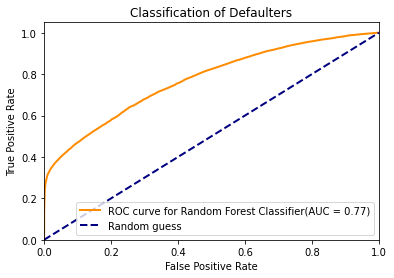

In [6]:
#Create the model (Random forest)
born_forest = ensemble.RandomForestClassifier(n_estimators=100, max_depth=12)
born_forest.fit(X_train, y_train)

#Plot the ROC curve and calculate the AUC
pscore_forest = born_forest.predict_proba(X_train)[:,1]

roc_p = metrics.roc_curve(y_train, pscore_forest)
auc_p = auc_p = metrics.auc(roc_p[0],roc_p[1] )

line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
          label=f"ROC curve for Random Forest Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Classification of Defaulters")
plt.legend(loc='lower right')

In [7]:
#Calculate the feature importance as the sum of the importance of every category 
#belonging to each feature
featureImportances = {'NUMERO_EMBARAZOS':0,'SEG_SOCIAL':0,'NIV_EDUCATIVO_M':0,\
                      'TIPO_EMBARAZO':0,'AREA_RESIDENCIA':0,'DEPTO_RESIDENCIA':0}
featureImportances['NUMERO_EMBARAZOS'] = born_forest.feature_importances_[0].sum()
featureImportances['SEG_SOCIAL'] = born_forest.feature_importances_[1:6].sum()
featureImportances['NIV_EDUCATIVO_M'] = born_forest.feature_importances_[6:15].sum()
featureImportances['TIPO_EMBARAZO'] = born_forest.feature_importances_[15:19].sum()
featureImportances['AREA_RESIDENCIA'] = born_forest.feature_importances_[19:23].sum()
featureImportances['DEPTO_RESIDENCIA'] = born_forest.feature_importances_[23::].sum()

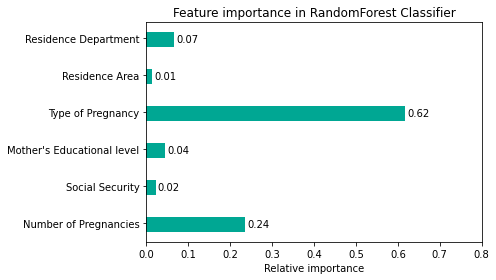

In [8]:
#Plot the feature importance as a barplot using more natural names for each feature
features_name = ['Number of Pregnancies','Social Security',"Mother's Educational level",\
                 'Type of Pregnancy','Residence Area','Residence Department']
y = list(featureImportances.values())
#plot
fig, ax = plt.subplots(figsize=(7,4)) 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width,color=[0,0.65490196,0.57647059])
ax.set_yticks(ind+width/10)
ax.set_yticklabels(features_name, minor=False)
ax.set_xlim(0,0.8)
for index, value in enumerate(y):
    plt.text(value+0.005, index-0.075, str(round(value,2)))

plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.tight_layout()
plt.savefig("/content/drive/My Drive/DS4A/feature_importance.png",bbox_inches = 'tight')


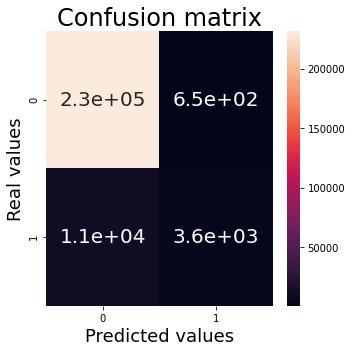

In [11]:
#Plot the confusion matrix for the test set

pred = np.array(born_forest.predict(X_test) > 0.5, dtype=float)
cm = np.histogram2d(y_test, pred, bins=2)[0]

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

## Decision Tree

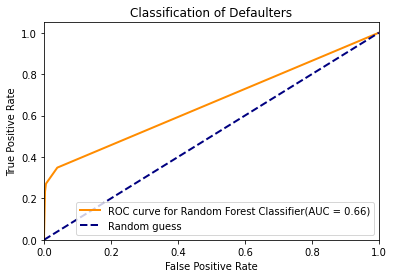

In [12]:
#Create the model (Decision Tree)
born_tree = tree.DecisionTreeClassifier(max_depth = 3)
born_tree = born_tree.fit(X_train, y_train)

#Plot the ROC curve and calculate the AUC
pscore_tree = born_tree.predict_proba(X_train)[:,1]

roc_p = metrics.roc_curve(y_train, pscore_tree)
auc_p = auc_p = metrics.auc(roc_p[0],roc_p[1] )

line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
          label=f"ROC curve for Random Forest Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Classification of Defaulters")
plt.legend(loc='lower right')

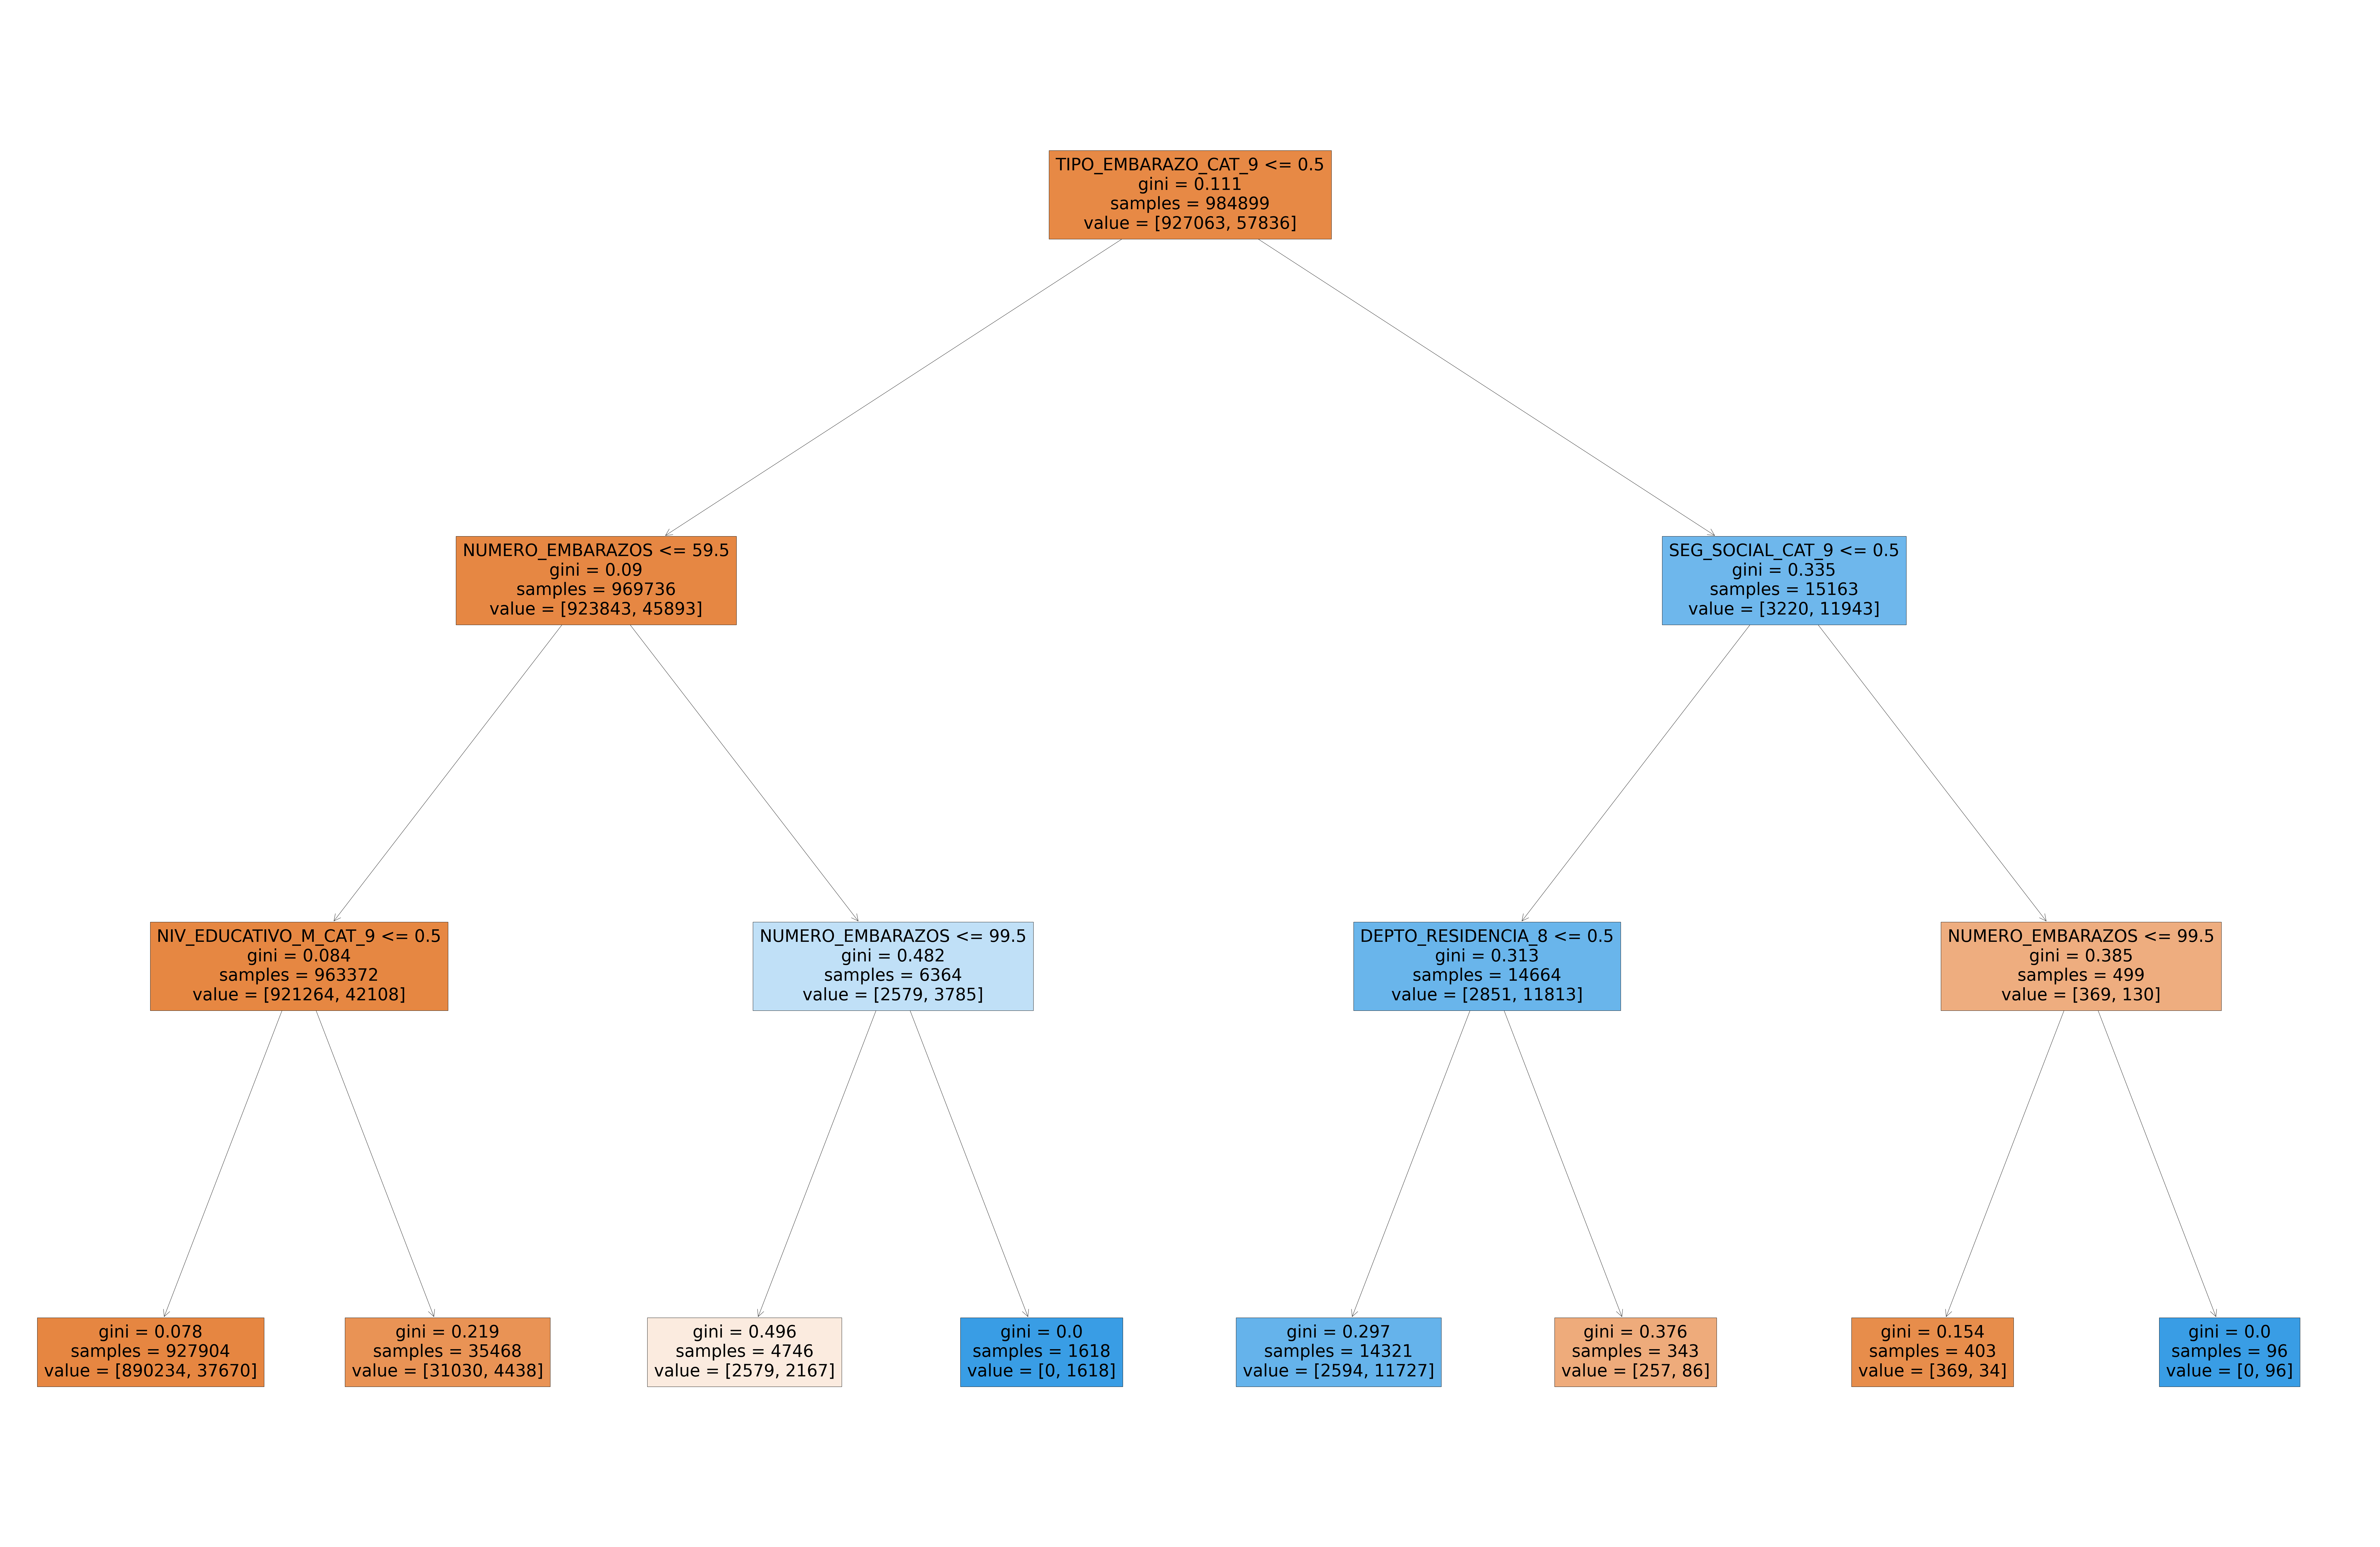

In [13]:
#Plot the tree
fig = plt.gcf()
fig.set_size_inches(150, 100)
tree.plot_tree(born_tree,filled=True,feature_names=list(X_train.columns))
fig.savefig('drive/My Drive/DS4A/tree.png')

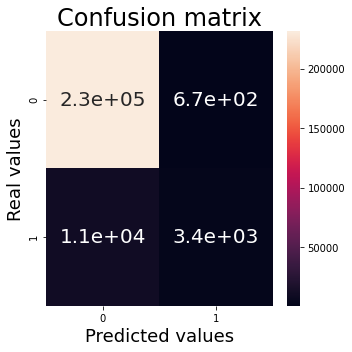

In [14]:
#Plot the confusion matrix for the test set

pred = np.array(born_tree.predict(X_test) > 0.5, dtype=float)
cm = np.histogram2d(y_test, pred, bins=2)[0]

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()